In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Spotify-2000.csv to Spotify-2000.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Spotify-2000.csv']))
df

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,1990,Heartbreak Hotel,Elvis Presley,adult standards,1958,94,21,70,-12,11,72,128,84,7,63
1990,1991,Hound Dog,Elvis Presley,adult standards,1958,175,76,36,-8,76,95,136,73,6,69
1991,1992,Johnny B. Goode,Chuck Berry,blues rock,1959,168,80,53,-9,31,97,162,74,7,74
1992,1993,Take Five,The Dave Brubeck Quartet,bebop,1959,174,26,45,-13,7,60,324,54,4,65


[Text(0, 0.5, 'Frequency'), Text(0.5, 1.0, 'Energy Histogram')]

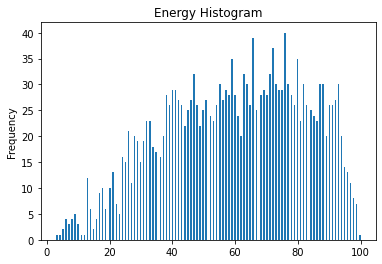

In [ ]:
plt.hist(df['Energy'], bins=200)
plt.gca().set(title='Energy Histogram', ylabel='Frequency')

[Text(0, 0.5, 'Frequency'), Text(0.5, 1.0, 'Danceability Histogram')]

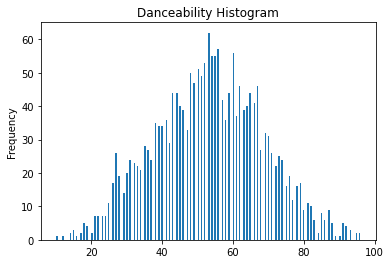

In [ ]:
plt.hist(df['Danceability'], bins=200)
plt.gca().set(title='Danceability Histogram', ylabel='Frequency')



[Text(0, 0.5, 'Frequency'), Text(0.5, 1.0, 'Liveness')]

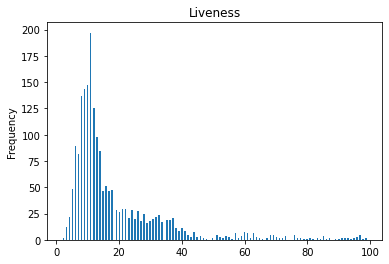

In [ ]:
plt.hist(df['Liveness'], bins=200)
plt.gca().set(title='Liveness', ylabel='Frequency')

[Text(0, 0.5, 'Frequency'), Text(0.5, 1.0, 'Valence Histogram')]

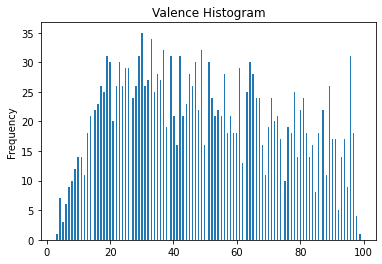

In [ ]:
plt.hist(df['Valence'], bins=200)
plt.gca().set(title='Valence Histogram', ylabel='Frequency')

[Text(0, 0.5, 'Frequency'), Text(0.5, 1.0, 'Acousticness')]

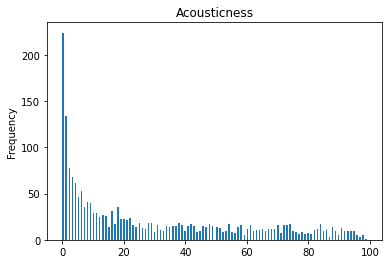

In [ ]:
plt.hist(df['Acousticness'], bins=200)
plt.gca().set(title='Acousticness', ylabel='Frequency')

[Text(0, 0.5, 'Frequency'), Text(0.5, 1.0, 'Speechiness Histogram')]

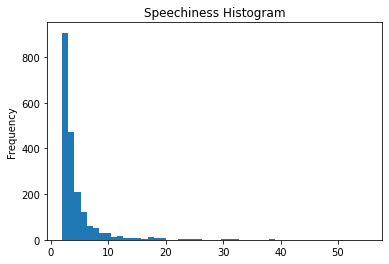

In [ ]:
plt.hist(df['Speechiness'], bins=50)
plt.gca().set(title='Speechiness Histogram', ylabel='Frequency')

In [ ]:
df.values

array([[1, 'Sunrise', 'Norah Jones', ..., 94, 3, 71],
       [2, 'Black Night', 'Deep Purple', ..., 17, 7, 39],
       [3, 'Clint Eastwood', 'Gorillaz', ..., 2, 17, 69],
       ...,
       [1992, 'Johnny B. Goode', 'Chuck Berry', ..., 74, 7, 74],
       [1993, 'Take Five', 'The Dave Brubeck Quartet', ..., 54, 4, 65],
       [1994, 'Blueberry Hill', 'Fats Domino', ..., 74, 3, 56]],
      dtype=object)

In [ ]:
df2 = df.filter(["Energy", "Danceability", "Liveness", "Valence", "Acousticness", "Speechiness"], axis=1)
df2

,Energy,Danceability,Liveness,Valence,Acousticness,Speechiness
0,30,53,11,68,94,3
1,79,50,17,81,17,7
2,69,66,7,52,2,17
3,96,43,3,37,0,4
4,82,58,10,87,1,3
...,...,...,...,...,...,...
1989,21,70,11,72,84,7
1990,76,36,76,95,73,6
1991,80,53,31,97,74,7
1992,26,45,7,60,54,4


In [ ]:
from sklearn.preprocessing import StandardScaler
X = df2.values
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled

array([[-1.3400087 , -0.01552124, -0.47909756,  0.74808025,  2.24590849,
        -0.45335805],
       [ 0.87230421, -0.21099081, -0.12031418,  1.27117745, -0.4088327 ,
         0.45563738],
       [ 0.42081178,  0.83151359, -0.71828647,  0.10426831, -0.92599008,
         2.72812596],
       ...,
       [ 0.91745345, -0.01552124,  0.71684702,  1.91498938,  1.55636532,
         0.45563738],
       [-1.52060568, -0.53677344, -0.71828647,  0.42617428,  0.86682216,
        -0.2261092 ],
       [-0.43702384, -0.27614734, -0.18011141,  1.35165394,  1.55636532,
        -0.45335805]])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
X_pca

array([[ 1.66475637, -1.6484432 ],
       [-1.33320148,  0.04190957],
       [-1.61114162, -0.24698421],
       ...,
       [-0.86739858, -0.44367778],
       [ 1.4034789 , -0.95478631],
       [ 0.58090869, -1.06383855]])

In [ ]:
pca.explained_variance_ratio_*100

array([35.83540733, 20.57841059])

Text(0, 0.5, 'Explained Variance')

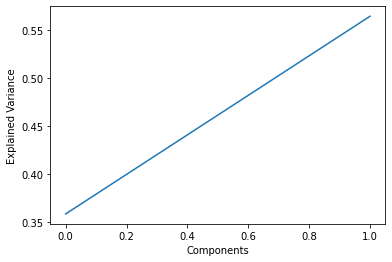

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Components")
plt.ylabel("Explained Variance")

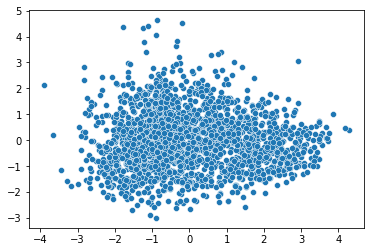

In [ ]:
import seaborn as sns
plt.figure()
sns.scatterplot(x=X_pca[:,0],y=X_pca[:,1])

In [ ]:
X_pca

array([[ 1.66475637, -1.6484432 ],
       [-1.33320148,  0.04190957],
       [-1.61114162, -0.24698421],
       ...,
       [-0.86739858, -0.44367778],
       [ 1.4034789 , -0.95478631],
       [ 0.58090869, -1.06383855]])

In [ ]:
len(X_pca)

1994

In [ ]:

pca_df = pd.DataFrame(X_pca)
pca_df.columns = ["component_one", "component_two"]
pca_df

,component_one,component_two
0,1.664756,-1.648443
1,-1.333201,0.041910
2,-1.611142,-0.246984
3,-0.766069,0.880436
4,-1.726042,-0.482520
...,...,...
1989,1.028077,-2.330888
1990,-0.594033,1.625544
1991,-0.867399,-0.443678
1992,1.403479,-0.954786


In [ ]:

"""
indices_to_names = pd.Series(df.Title.values,index=df.Index).to_dict()

indices = df["Index"]
pca_df["Index"] = indices
pca_df
"""
titles = df["Title"]
pca_df["Title"] = titles
pca_df

,component_one,component_two,Title
0,1.664756,-1.648443,Sunrise
1,-1.333201,0.041910,Black Night
2,-1.611142,-0.246984,Clint Eastwood
3,-0.766069,0.880436,The Pretender
4,-1.726042,-0.482520,Waitin' On A Sunny Day
...,...,...,...
1989,1.028077,-2.330888,Heartbreak Hotel
1990,-0.594033,1.625544,Hound Dog
1991,-0.867399,-0.443678,Johnny B. Goode
1992,1.403479,-0.954786,Take Five


In [ ]:
features = ["component_one", "component_two"]
predictor = ["Title"]

x = pca_df[features].values
y = pca_df[predictor].values.ravel()

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x, y)

KNeighborsClassifier()

In [ ]:

pca_df.loc[pca_df["Title"] == "Sunrise"]


,component_one,component_two,Title
0,1.664756,-1.648443,Sunrise
356,-2.147206,-1.558864,Sunrise


In [ ]:
predicted= model.predict([[1.664756, -1.648443]])
print(predicted)

['Het het nog nooit zo donker west']


In [ ]:
pca_df.loc[pca_df["Title"] == "Billie Jean"]
pca_df.loc[pca_df["Title"] == "Uptown Funk"]


     component_one  component_two                             Title
690       1.657744        -1.4642  Het het nog nooit zo donker west
     component_one  component_two    Title
0         1.664756      -1.648443  Sunrise
356      -2.147206      -1.558864  Sunrise


In [ ]:
#Type title of song here
title = "Uptown Funk"
entry = pca_df.loc[pca_df["Title"] == title]


if (entry.size != 3):
  component_one = float(entry["component_one"][0])
  component_two = float(entry["component_two"][0])
else:
  component_one = float(entry["component_one"])
  component_two = float(entry["component_two"])

nbarray = model.kneighbors([[component_one, component_two]], n_neighbors = 6, return_distance=False)
for index in nbarray:
  print(pca_df.loc[index]["Title"] + " by " + df.loc[index]["Artist"])



612                         Uptown Funk by Mark Ronson
1075                  Le Freak - 2018 Remaster by CHIC
192                      The Real Slim Shady by Eminem
1231    P.Y.T. (Pretty Young Thing) by Michael Jackson
1209                    Billie Jean by Michael Jackson
1129           Boogie Wonderland by Earth, Wind & Fire
dtype: object
